In [91]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random 
from imageio.v2 import imread, imwrite
from riffusion.spectrogram_image_converter import SpectrogramImageConverter
from riffusion.spectrogram_params import SpectrogramParams
from PIL import Image

ex = "pop.00024_e1.jpg"

source_path = os.path.join("gtzan-preprocessed","source-fullspec",ex)
target_path = os.path.join("gtzan-preprocessed","target", ex)

test_img = Image.open(source_path).convert("RGB")

img_converter_to_audio = SpectrogramImageConverter(SpectrogramParams(sample_rate=44100, min_frequency=0, max_frequency=10000))

test_audio = img_converter_to_audio.audio_from_spectrogram_image(test_img, apply_filters=True).set_channels(2)

test_audio

/Users/zachary/Desktop/Stanford/_Spr2023/Riff-CNET/riff-cnet/riffusion/spectrogram_image_converter.py:21: UserWarning: WARNING: cuda is not available, using cpu instead.
  self.converter = SpectrogramConverter(params=params, device=device)


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random 
from imageio.v2 import imread, imwrite

## load in source and target specgrams
source_spectrogram = imread("source_spectrogram_test.jpg")
target_spectrogram = imread("target_spectrogram_test.jpg")

In [21]:
from riffusion.spectrogram_image_converter import SpectrogramImageConverter
from riffusion.spectrogram_params import SpectrogramParams
from PIL import Image

test_img = Image.open("source_spectrogram_test.jpg").convert("RGB")

img_converter_to_audio = SpectrogramImageConverter(SpectrogramParams(sample_rate=44100, min_frequency=0, max_frequency=10000))

test_audio = img_converter_to_audio.audio_from_spectrogram_image(test_img, apply_filters=True).set_channels(2)

test_audio

/Users/zachary/Desktop/Stanford/_Spr2023/Riff-CNET/riff-cnet/riffusion/spectrogram_image_converter.py:21: UserWarning: WARNING: cuda is not available, using cpu instead.
  self.converter = SpectrogramConverter(params=params, device=device)


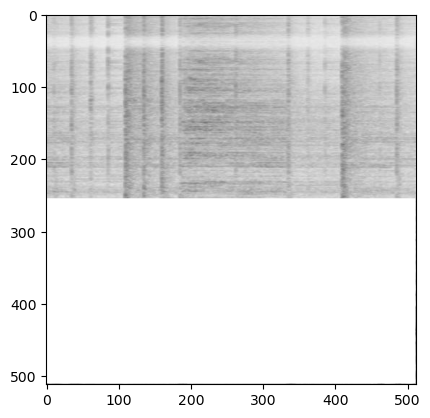

In [59]:
# crop area of image
def crop_and_listen(test_img, topleft, bottomright):

    test_img_arr = np.copy(np.asarray(test_img))
    test_img_arr[topleft[0]:bottomright[0], topleft[1]:bottomright[1],:] = 255
    filt_img = Image.fromarray(test_img_arr)
    plt.imshow(filt_img)
    plt.show()
    test_audio = img_converter_to_audio.audio_from_spectrogram_image(filt_img, apply_filters=True).set_channels(2)
    return test_audio

test_audio = crop_and_listen(test_img, (255,0), (511,511))
test_audio

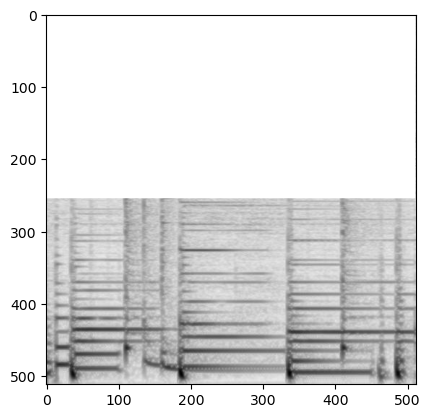

In [60]:
test_audio = crop_and_listen(test_img, (0,0), (255,511))
test_audio

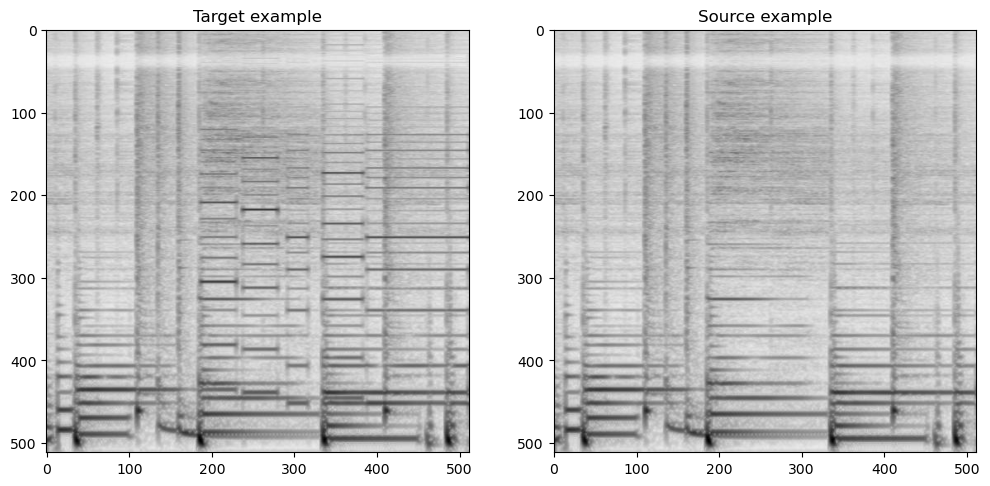

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(target_spectrogram)
plt.title("Target example")
plt.subplot(1,2,2)
plt.imshow(source_spectrogram)
plt.title("Source example")
plt.show()

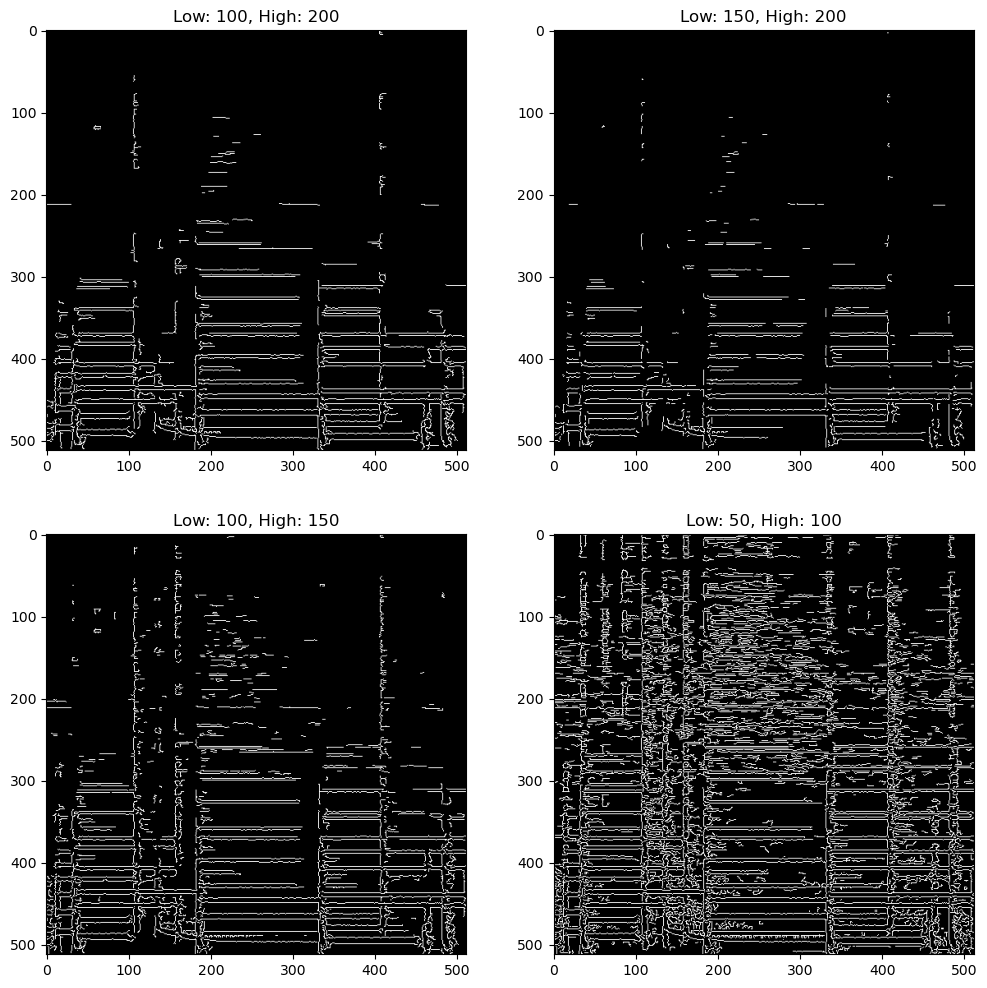

In [12]:
import cv2

# show just plain canny
source = cv2.Canny(source_spectrogram, 100, 200)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(cv2.Canny(source_spectrogram, 100, 200), cmap='gray')
plt.title("Low: 100, High: 200")
plt.subplot(2,2,2)
plt.imshow(cv2.Canny(source_spectrogram, 150, 200), cmap='gray')
plt.title("Low: 150, High: 200")
plt.subplot(2,2,3)
plt.imshow(cv2.Canny(source_spectrogram, 100, 150), cmap='gray')
plt.title("Low: 100, High: 150")
plt.subplot(2,2,4)
plt.imshow(cv2.Canny(source_spectrogram, 50, 100), cmap='gray')
plt.title("Low: 50, High: 100")
plt.show()

/Users/zachary/miniconda3/envs/mel-gen/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


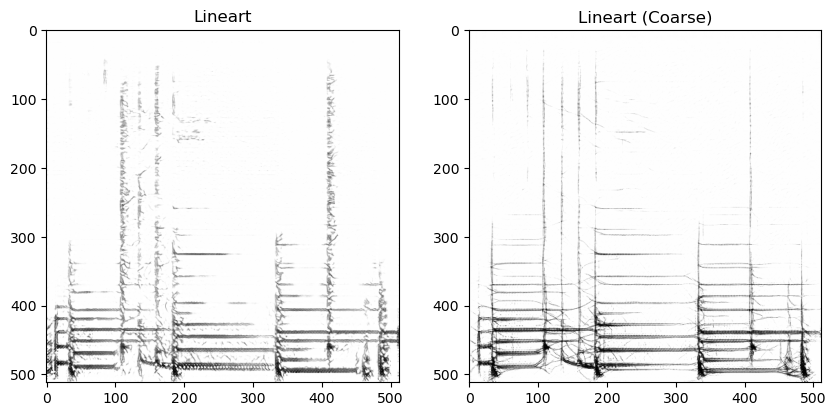

In [7]:
# test out sketch detector

from annotator.lineart import LineartDetector

preprocessor = LineartDetector()
detected_map_coarse = preprocessor(source_spectrogram, coarse=True)
detected_map = preprocessor(source_spectrogram, coarse=False)

plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(detected_map, cmap='gray')
plt.title("Lineart")
plt.subplot(1,2,2)
plt.imshow(detected_map_coarse, cmap='gray')
plt.title("Lineart (Coarse)")
plt.show()

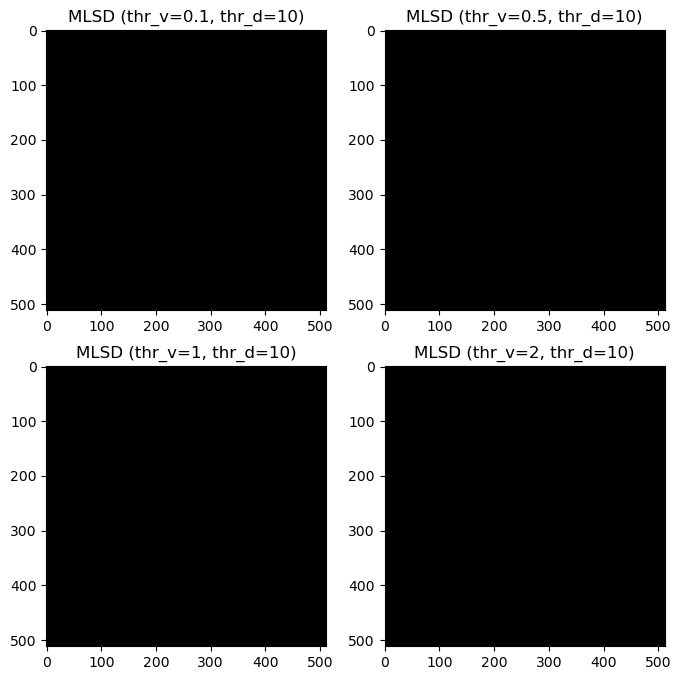

In [21]:
# test out mlsd detector

from annotator.mlsd import MLSDdetector

#thr_v: value threshold between 0.1 and 2 (default 0.1)
#thr_d: distance threshold between 0.1 and 20 (default 0.1)

preprocessor = MLSDdetector()

plt.figure(figsize=(8,8))
for i, (thr_v, thr_d) in enumerate([(0.1, 10), (0.5, 10), (1, 10), (2, 10)]):
    plt.subplot(2,2,i+1)
    detected_map = preprocessor(source_spectrogram, thr_v, thr_d)
    plt.imshow(detected_map, cmap='gray')
    plt.title(f"MLSD (thr_v={thr_v}, thr_d={thr_d})")
plt.show()


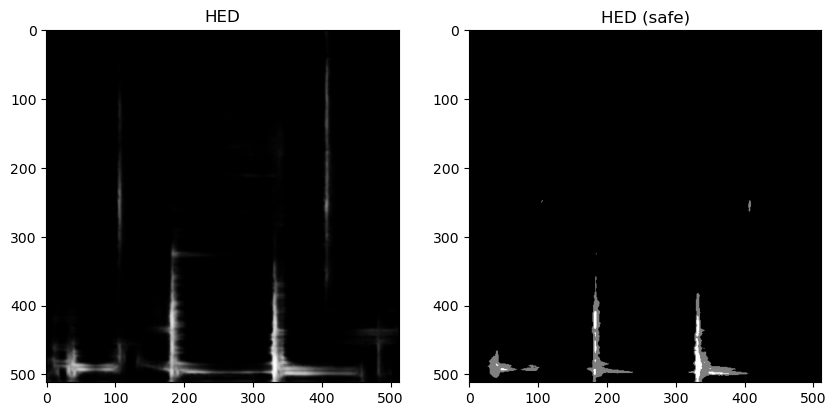

In [10]:
# test out softedge (HED)

from annotator.hed import HEDdetector

preprocessor = HEDdetector()
detected_map = preprocessor(source_spectrogram, safe=False)
detected_map_safe = preprocessor(source_spectrogram, safe=True)

plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(detected_map, cmap='gray')
plt.title("HED")
plt.subplot(1,2,2)
plt.imshow(detected_map_safe, cmap='gray')
plt.title("HED (safe)")
plt.show()


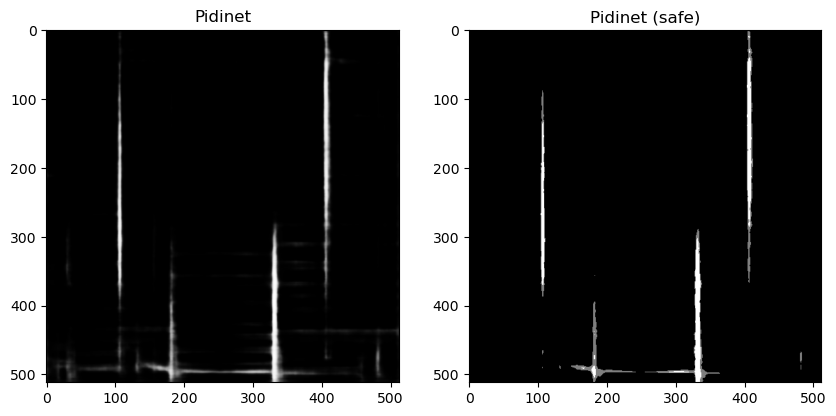

In [9]:
# test out softedge (Pidi)

from annotator.pidinet import PidiNetDetector

preprocessor = PidiNetDetector()
detected_map = preprocessor(source_spectrogram, safe=False)
detected_map_safe = preprocessor(source_spectrogram, safe=True)

plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(detected_map, cmap='gray')
plt.title("Pidinet")
plt.subplot(1,2,2)
plt.imshow(detected_map_safe, cmap='gray')
plt.title("Pidinet (safe)")
plt.show()

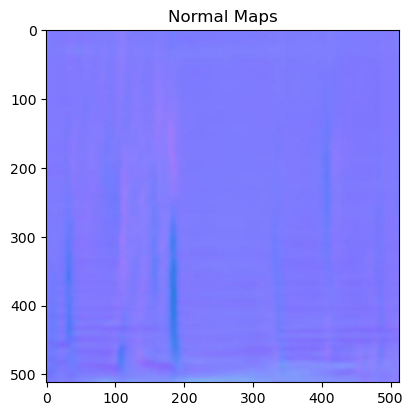

In [4]:
# test out normal maps

# from annotator.normalbae import NormalBaeDetector

# preprocessor = NormalBaeDetector()

# detected_map = preprocessor(source_spectrogram)
#imwrite( "source_spectrogram_normal_map.jpg", detected_map)
# restart kernel for matplotlib error

normal_map = imread("source_spectrogram_normal_map.jpg")
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(normal_map)
plt.title("Normal Maps")
plt.show()

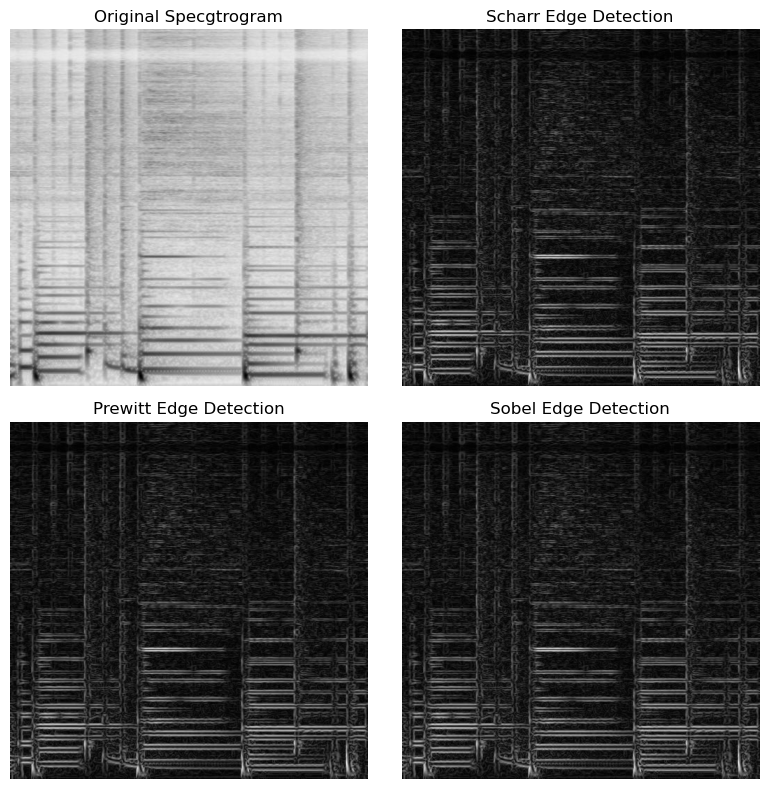

In [24]:
from skimage import filters
from skimage import morphology

edge_sobel = filters.sobel(source_spectrogram)
edge_sobel = edge_sobel / np.max(edge_sobel)

edge_scharr = filters.scharr(source_spectrogram)
edge_scharr = edge_scharr / np.max(edge_scharr)

edge_prewitt = filters.prewitt(source_spectrogram)
edge_prewitt = edge_prewitt / np.max(edge_prewitt)


fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
axes = axes.ravel()

axes[0].imshow(source_spectrogram, cmap=plt.cm.gray)
axes[0].set_title('Original Specgtrogram')

axes[1].imshow(edge_scharr, cmap=plt.cm.gray)
axes[1].set_title('Scharr Edge Detection')

axes[2].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[2].set_title('Prewitt Edge Detection')

axes[3].imshow(edge_sobel, cmap=plt.cm.gray)
axes[3].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

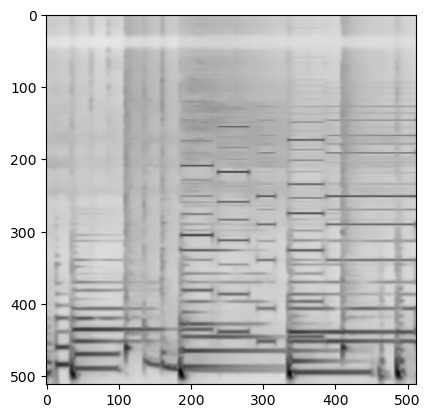

In [52]:
img = cv2.imread( 'test.jpg' )  
  
# denoising the image using the cv2.fastNlMeansDenoising() function  
dst = cv2.fastNlMeansDenoising(img, None, 15, 7, 21 )  
plt.imshow(dst)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


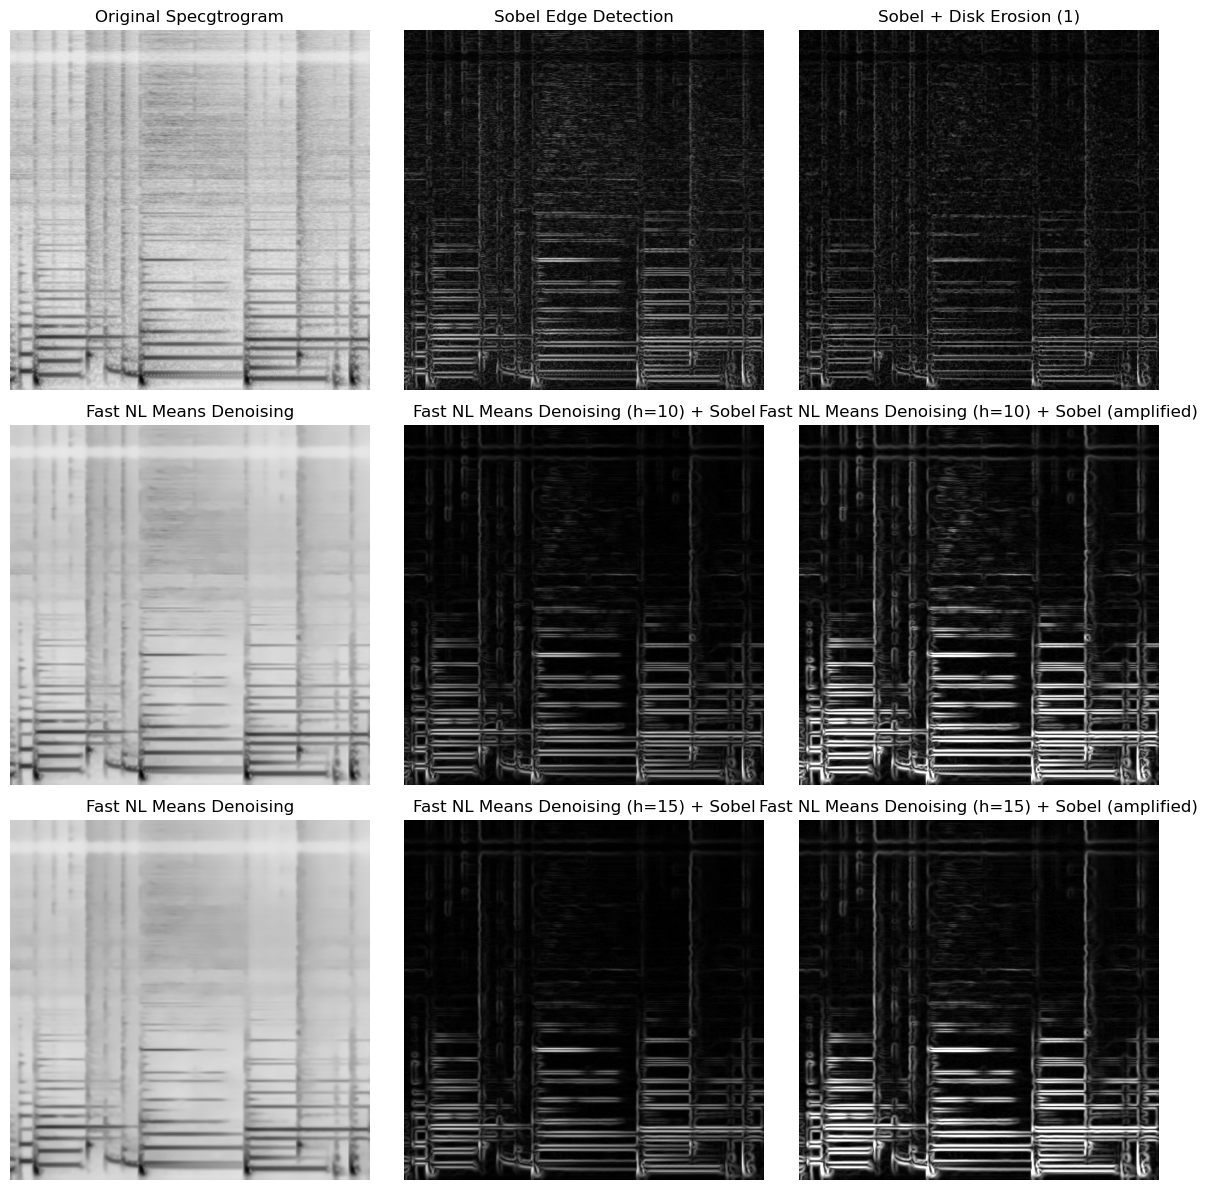

In [67]:
# try isotropic erosion
import cv2
from skimage import filters
from skimage import morphology

edge_sobel = filters.sobel(source_spectrogram)
edge_sobel = edge_sobel / np.max(edge_sobel)

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True,
                         figsize=(12, 12))
axes = axes.ravel()

axes[0].imshow(source_spectrogram, cmap=plt.cm.gray)
axes[0].set_title('Original Specgtrogram')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

edges_morphed = morphology.erosion(edge_sobel[:,:,0], footprint= morphology.disk(1))
edges_morphed = edges_morphed / np.max(edges_morphed)
axes[2].imshow(edges_morphed, cmap=plt.cm.gray)
axes[2].set_title('Sobel + Disk Erosion (1)')

source_denoised = cv2.fastNlMeansDenoising(source_spectrogram,None, 10, 7, 21)  
axes[3].imshow(source_denoised, cmap=plt.cm.gray)
axes[3].set_title('Fast NL Means Denoising (h=10)')

edges_sobel_denoised = filters.sobel(source_denoised)
edges_sobel_denoised = edges_sobel_denoised / np.max(edges_sobel_denoised)
axes[4].imshow(edges_sobel_denoised, cmap=plt.cm.gray)
axes[4].set_title('Fast NL Means Denoising (h=10) + Sobel')

axes[5].imshow(edges_sobel_denoised * 2, cmap=plt.cm.gray)
axes[5].set_title('Fast NL Means Denoising (h=10) + Sobel (amplified)')


source_denoised = cv2.fastNlMeansDenoising(source_spectrogram,None, 15, 7, 21)  
axes[6].imshow(source_denoised, cmap=plt.cm.gray)
axes[6].set_title('Fast NL Means Denoising (h=15)')

edges_sobel_denoised = filters.sobel(source_denoised)
edges_sobel_denoised = edges_sobel_denoised / np.max(edges_sobel_denoised)
axes[7].imshow(edges_sobel_denoised, cmap=plt.cm.gray)
axes[7].set_title('Fast NL Means Denoising (h=15) + Sobel')

axes[8].imshow(edges_sobel_denoised * 2, cmap=plt.cm.gray)
axes[8].set_title('Fast NL Means Denoising (h=15) + Sobel (amplified)')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

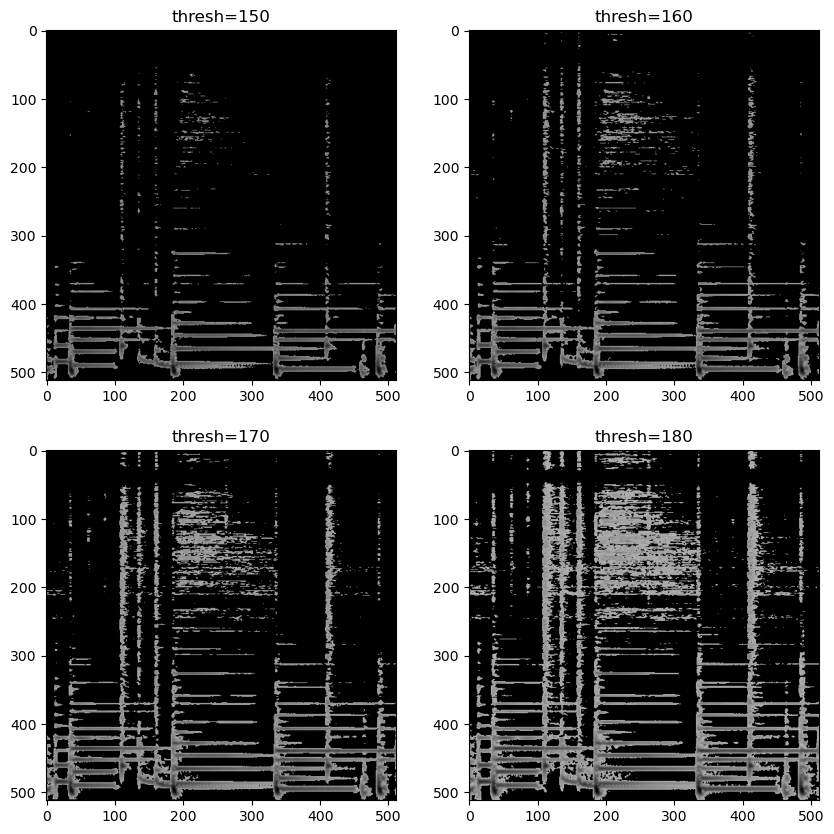

In [7]:
# thresholding
threshs = [150, 160, 170, 180]

# invert spec

# hard threshs for diff values
plt.figure(figsize=(10,10))
for i, thresh in enumerate(threshs):
    cond = np.copy(source_spectrogram)
    cond[cond > thresh] = 0
    plt.subplot(2,2,i+1)
    plt.imshow(cond)
    plt.title(f"thresh={thresh}")